In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from other_funcs import *

In [2]:
df = pd.read_csv('predicted_gw7_simple.csv')
df_sorted = df.sort_values('predicted_points', ascending=False)

<Axes: xlabel='value', ylabel='Density'>

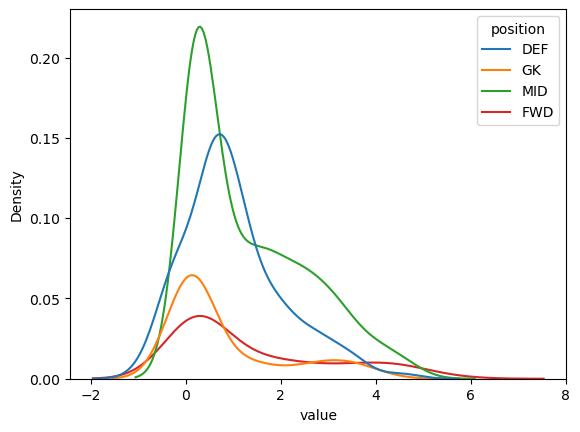

In [3]:
sns.kdeplot(data=df.melt(id_vars=['full_name', 'position']).query('variable=="predicted_points"'), x='value', hue='position')

In [4]:
df_sorted.head(60)['position'].value_counts()

position
MID    28
FWD    14
DEF    10
GK      8
Name: count, dtype: int64

In [5]:
df_sorted['owner'].value_counts()

owner
88376.0    15
93330.0    15
85646.0    15
87737.0    15
94654.0    15
85076.0    15
Name: count, dtype: int64

In [6]:
df_de = df_sorted.query('owner==88376.0')
df_de



,full_name,position,team,ewma_total_points,predicted_points,owner
207,erling_haaland,FWD,Man City,11.85607,5.551012,88376.0
237,gabriel_gudmundsson,DEF,Leeds,3.50670,4.415612,88376.0
705,viktor_gyokeres,FWD,Arsenal,3.03733,4.370965,88376.0
671,tijjani_reijnders,MID,Man City,4.96156,4.123783,88376.0
176,dominik_szoboszlai,MID,Liverpool,3.96890,4.092794,88376.0
280,iliman_ndiaye,MID,Everton,4.22768,3.786342,88376.0
526,morgan_gibbs_white,MID,Nott'm Forest,2.20421,3.428605,88376.0
465,marc_cucurella_saseta,DEF,Chelsea,2.46911,3.361061,88376.0
367,jordan_pickford,GK,Everton,3.21149,3.254165,88376.0
675,tino_livramento,DEF,Newcastle,6.36015,2.765312,88376.0


In [7]:
df_sorted.query('full_name=="james_tarkowski"').head(50)

,full_name,position,team,ewma_total_points,predicted_points,owner
316,james_tarkowski,DEF,Everton,3.66322,-0.7227,88376.0


In [8]:
pred_points = get_all_best_11s(df_sorted)

Doug: predicted points 41.8
Marcus: predicted points 37.41
Will: predicted points 37.17
Lucas: predicted points 34.84
Dave: predicted points 29.28
Rory: predicted points 32.43


In [23]:
pred_points

[                full_name position           team  ewma_total_points  \
 9          erling_haaland      FWD       Man City           11.85607   
 1     gabriel_gudmundsson      DEF          Leeds            3.50670   
 10        viktor_gyokeres      FWD        Arsenal            3.03733   
 4       tijjani_reijnders      MID       Man City            4.96156   
 5      dominik_szoboszlai      MID      Liverpool            3.96890   
 6           iliman_ndiaye      MID        Everton            4.22768   
 7      morgan_gibbs_white      MID  Nott'm Forest            2.20421   
 2   marc_cucurella_saseta      DEF        Chelsea            2.46911   
 0         jordan_pickford       GK        Everton            3.21149   
 3         tino_livramento      DEF      Newcastle            6.36015   
 8              phil_foden      MID       Man City            2.76603   
 
     predicted_points owner formation  
 9           5.551012  Doug     3-5-2  
 1           4.415612  Doug     3-5-2  
 1

In [20]:
lw_results = pd.DataFrame({'User': ['Doug', 'Lucas', 'Will', 'Marcus', 'Dave', 'Rory'],
              'Predicted points': pred_points,
              'Actual points': [33, 13, 39, 36, 30, 42]}, 
              )

In [21]:
lw_results.sort_values('Actual points', ascending=False)

,User,Predicted points,Actual points
5,Rory,full_name position ...,42
2,Will,full_name position ...,39
3,Marcus,full_name positi...,36
0,Doug,full_name position t...,33
4,Dave,full_name position ...,30
1,Lucas,full_name position ...,13


In [22]:
plt.figure(figsize=(3,3))
ax = sns.scatterplot(data=lw_results, x='Predicted points', y='Actual points', hue='User', s=100)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 300x300 with 0 Axes>

# Figuring out how the model did last week

In [12]:
gw6 = pd.read_csv('predicted_gw6_simple.csv')
gw6

,full_name,position,team,ewma_total_points,predicted_points,owner
0,aaron_anselmino,DEF,Chelsea,0.0000,0.108120,NaN
1,aaron_hickey,DEF,Brentford,0.3129,0.214515,NaN
2,aaron_ramsdale,GK,Newcastle,0.0000,0.061611,NaN
3,aaron_ramsey,MID,Burnley,0.0000,0.178312,NaN
4,aaron_wan_bissaka,DEF,West Ham,0.2401,0.729524,NaN
...,...,...,...,...,...,...
736,zain_silcott_duberry,MID,Bournemouth,0.0000,0.263160,NaN
737,zak_johnson,DEF,Sunderland,0.0000,0.122112,NaN
738,zeki_amdouni,FWD,Burnley,0.0000,0.067864,NaN
739,zepiqueno_redmond,FWD,Aston Villa,0.0000,0.236978,NaN


In [13]:
gw7 = pd.read_csv('predicted_gw7.csv')
gw6_7_merged = gw6.merge(gw7[['full_name', 'total_points']], on='full_name')

In [14]:
import numpy as np
import scipy
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [15]:
x = gw6_7_merged['predicted_points']
y = gw6_7_merged['total_points']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(r_value)

0.5529193700354283


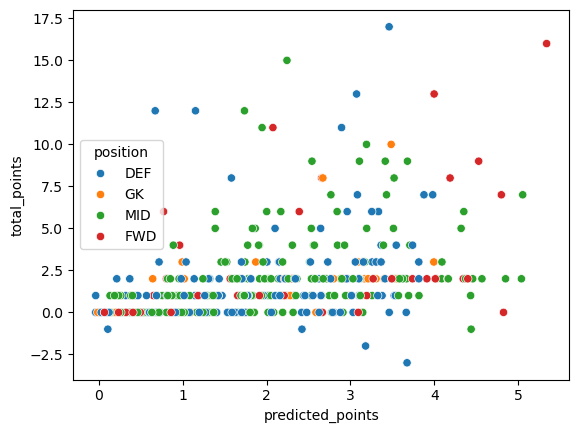

In [16]:
sns.scatterplot(data=gw6_7_merged, x='predicted_points', y='total_points', hue='position')
x_range = np.linspace(0,6, 100)
y_range = slope*x_range + intercept
# plt.plot(x_range, y_range, color='black')

<Axes: xlabel='ewma_total_points', ylabel='total_points'>

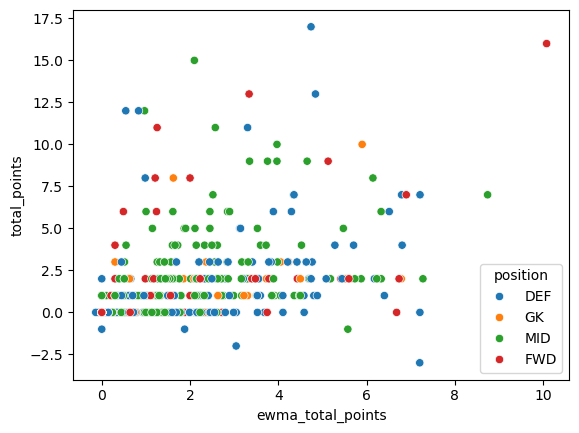

In [17]:
sns.scatterplot(data=gw6_7_merged, x='ewma_total_points', y='total_points', hue='position')


In [18]:
root_mean_squared_error(x, y)

1.8981549268092774